In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

In [9]:
data = 'output/cleaned_data.csv'
data = pd.read_csv(data)

In [10]:
male = data[data['sex'] == 'Male']['chol']
female = data[data['sex'] == 'Female']['chol']

In [11]:
data_male = data[data['sex'] == 'Male']['chol']
data_female = data[data['sex'] == 'Female']['chol']

normality_male = shapiro(data_male)
normality_female = shapiro(data_female)

normality_male, normality_female

(ShapiroResult(statistic=0.9943470043175925, pvalue=0.048170943224919716),
 ShapiroResult(statistic=0.982318430862002, pvalue=0.031794606729393216))

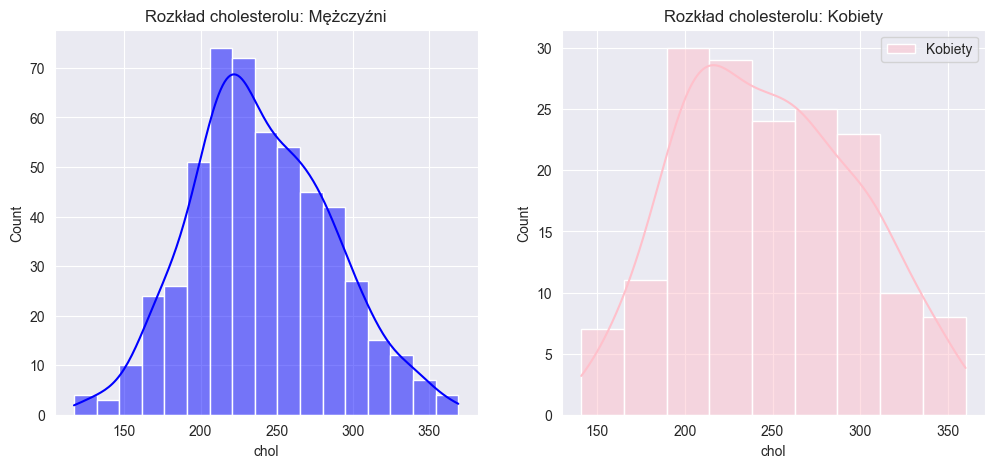

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data_male, kde=True, color="blue", ax=ax[0], label='Mężczyźni')
sns.histplot(data_female, kde=True, color="pink", ax=ax[1], label='Kobiety')
ax[0].set_title('Rozkład cholesterolu: Mężczyźni')
ax[1].set_title('Rozkład cholesterolu: Kobiety')
plt.legend()
plt.show()

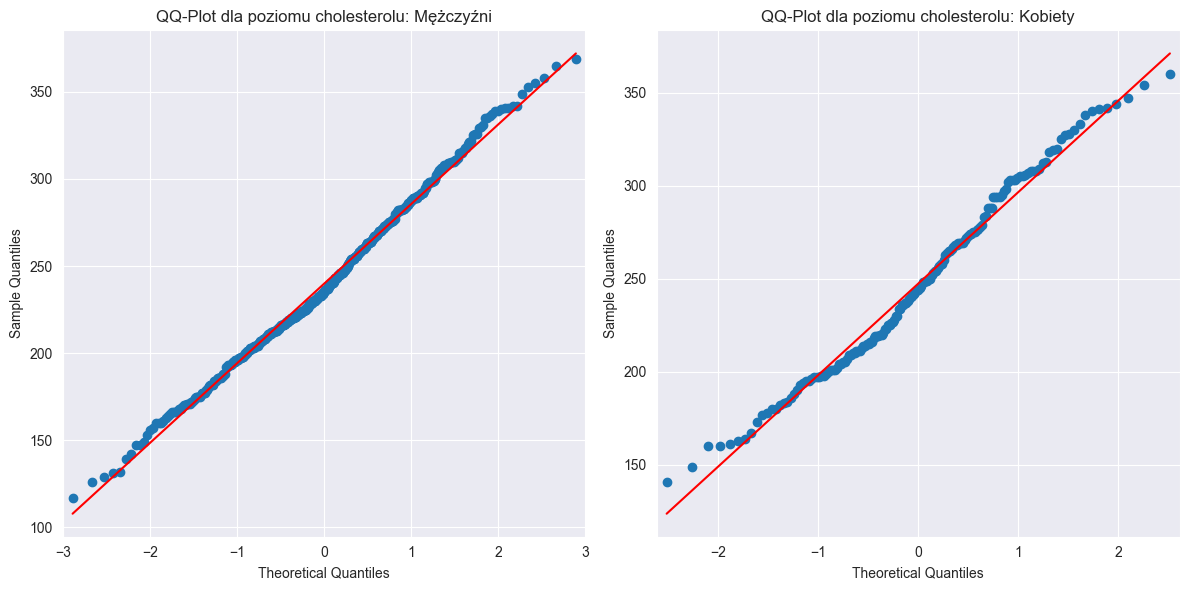

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sm.qqplot(data_male, line='s', ax=ax[0])
ax[0].set_title('QQ-Plot dla poziomu cholesterolu: Mężczyźni')

sm.qqplot(data_female, line='s', ax=ax[1])
ax[1].set_title('QQ-Plot dla poziomu cholesterolu: Kobiety')

plt.tight_layout()
plt.show()

Hipotezy
Hipoteza zerowa (H0): Nie ma różnicy w medianach poziomu cholesterolu między mężczyznami a kobietami.
Hipoteza alternatywna (H1): Istnieje różnica w medianach poziomu cholesterolu między mężczyznami a kobietami.

In [14]:

data_male = data[data['sex'] == 'Male']['chol']
data_female = data[data['sex'] == 'Female']['chol']

statistic, p_value = mannwhitneyu(data_male, data_female, alternative='two-sided')

print(f'Statystyka testu: {statistic}')
print(f'P-wartość: {p_value}')

Statystyka testu: 40632.0
P-wartość: 0.13527889966108417
